We build a recommendation system, called $\pm$Epsilon, for math papers on the arXiv.

# Data Acquisition

In [2]:
import urllib.request
import feedparser

In [89]:
import time

# Base api query url
base_url = 'http://export.arxiv.org/api/query?'
cat_list = ['math.AG', # Mathematics - Algebraic Geometry
'math.AT', # Mathematics - Algebraic Topology
'math.AP', # Mathematics - Analysis of PDEs
'math.CT', # Mathematics - Category Theory
'math.CA', # Mathematics - Classical Analysis and ODEs
'math.CO', # Mathematics - Combinatorics
'math.AC', # Mathematics - Commutative Algebra
'math.CV', # Mathematics - Complex Variables
'math.DG', # Mathematics - Differential Geometry
'math.DS', # Mathematics - Dynamical Systems
'math.FA', # Mathematics - Functional Analysis
'math.GM', # Mathematics - General Mathematics
'math.GN', # Mathematics - General Topology
'math.GT', # Mathematics - Geometric Topology
'math.GR', # Mathematics - Group Theory
'math.HO', # Mathematics - History and Overview
'math.IT', # Mathematics - Information Theory
'math.KT', # Mathematics - K-Theory and Homology
'math.LO', # Mathematics - Logic
'math.MP', # Mathematics - Mathematical Physics
'math.MG', # Mathematics - Metric Geometry
'math.NT', # Mathematics - Number Theory
'math.NA', # Mathematics - Numerical Analysis
'math.OA', # Mathematics - Operator Algebras
'math.OC', # Mathematics - Optimization and Control
'math.PR', # Mathematics - Probability
'math.QA', # Mathematics - Quantum Algebra
'math.RT', # Mathematics - Representation Theory
'math.RA', # Mathematics - Rings and Algebras
'math.SP', # Mathematics - Spectral Theory
'math.ST', # Mathematics - Statistics
'math.SG', # Mathematics - Symplectic Geometry
]
links_list = []

for cat in cat_list:

    # Search parameters
    search_query = 'cat:' + cat     # search_query = 'cat:math.AG', e.g.
    start = 0                       # start at the first result
    total_results = 5000             # want _ total results
    results_per_iteration = 500      # results at a time
    wait_time = 3                   # number of seconds to wait between calls

    print('Searching arXiv for %s' % search_query)

    for i in range(start,total_results,results_per_iteration):
    
        # print("Results %i - %i" % (i,i+results_per_iteration)
        
        query = 'search_query=%s&start=%i&max_results=%i' % (search_query,i,results_per_iteration)

        # perform a GET request using the base_url and query
        response = urllib.request.urlopen(base_url+query)

        # parse the response using feedparser
        feed = feedparser.parse(response)

        # Run through each entry, and append link to abstract
        for entry in feed.entries:
            for link in entry.links:
                if link.rel == 'alternate':
                    links_list.append((entry.title.replace('\n ',''),link.href))
                    # links_dic[entry.title.replace('\n ','')] = link.href
            # print(entry.title)
            # entry_clean_1 = entry.title.replace('\n ','')
            # titles_list.append(entry_clean_1)
            
        # Remember to play nice and sleep a bit before you call the api again!
        # print('Sleeping for %i seconds' % wait_time)
        time.sleep(wait_time)

Searching arXiv for cat:math.AG
Searching arXiv for cat:math.AT
Searching arXiv for cat:math.AP
Searching arXiv for cat:math.CT
Searching arXiv for cat:math.CA
Searching arXiv for cat:math.CO
Searching arXiv for cat:math.AC
Searching arXiv for cat:math.CV
Searching arXiv for cat:math.DG
Searching arXiv for cat:math.DS
Searching arXiv for cat:math.FA
Searching arXiv for cat:math.GM
Searching arXiv for cat:math.GN
Searching arXiv for cat:math.GT
Searching arXiv for cat:math.GR
Searching arXiv for cat:math.HO
Searching arXiv for cat:math.IT
Searching arXiv for cat:math.KT
Searching arXiv for cat:math.LO
Searching arXiv for cat:math.MP
Searching arXiv for cat:math.MG
Searching arXiv for cat:math.NT
Searching arXiv for cat:math.NA
Searching arXiv for cat:math.OA
Searching arXiv for cat:math.OC
Searching arXiv for cat:math.PR
Searching arXiv for cat:math.QA
Searching arXiv for cat:math.RT
Searching arXiv for cat:math.RA
Searching arXiv for cat:math.SP
Searching arXiv for cat:math.ST
Searchin

# Preprocessing

In [90]:
import pandas as pd

links_df = pd.DataFrame(links_list, columns = ['title','link'])

print(links_df.head())
print(links_df.info())

                                               title  \
0  Higgs line bundles, Green-Lazarsfeld sets,and ...   
1                     A theory of algebraic cocycles   
2                                 Zariski Geometries   
3  Configuration spaces and the space of rational...   
4        Stable vector bundles on algebraic surfaces   

                                  link  
0  http://arxiv.org/abs/math/9204225v1  
1  http://arxiv.org/abs/math/9204230v1  
2  http://arxiv.org/abs/math/9304212v1  
3  http://arxiv.org/abs/math/9410219v1  
4  http://arxiv.org/abs/math/9411233v1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147075 entries, 0 to 147074
Data columns (total 2 columns):
title    147075 non-null object
link     147075 non-null object
dtypes: object(2)
memory usage: 2.2+ MB
None


In [91]:
# <a href="https://pmepsilon.herokuapp.com" target = "_blank">pmepsilon.herokuapp.com</a>
links_df['tag'] = '<a href="' + links_df['link'] + '" target = "_blank">' + links_df['title'] + '</a>'

In [22]:
print(links_df.head())

                                               title  \
0  Higgs line bundles, Green-Lazarsfeld sets,and ...   
1                     A theory of algebraic cocycles   
2                                 Zariski Geometries   
3  Configuration spaces and the space of rational...   
4        Stable vector bundles on algebraic surfaces   

                                  link  \
0  http://arxiv.org/abs/math/9204225v1   
1  http://arxiv.org/abs/math/9204230v1   
2  http://arxiv.org/abs/math/9304212v1   
3  http://arxiv.org/abs/math/9410219v1   
4  http://arxiv.org/abs/math/9411233v1   

                                                 tag  
0  <a href="http://arxiv.org/abs/math/9204225v1" ...  
1  <a href="http://arxiv.org/abs/math/9204230v1" ...  
2  <a href="http://arxiv.org/abs/math/9304212v1" ...  
3  <a href="http://arxiv.org/abs/math/9410219v1" ...  
4  <a href="http://arxiv.org/abs/math/9411233v1" ...  


In [92]:
corpus_raw = u""

for i in range(links_df.shape[0]):
    line = links_df.loc[i, 'title']
    corpus_raw += line + '. '

In [20]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to
[n

[nltk_data]    |   Unzipping corpora/sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/sentence_polarity.zip.
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/shakespeare.zip.
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/sinica_treebank.zip.
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/smultron.zip.
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/state_union.zip.
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /Users/kadakia/nltk_data...
[nltk_data]    |   Unzipping corpora/stopwords.zip.
[nltk

True

In [93]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [94]:
raw_sentences = tokenizer.tokenize(corpus_raw) # same as sent_tokenize?

# print(raw_sentences)

In [95]:
import re, unidecode

# Convert sentences to words
from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
# lemmatizer = WordNetLemmatizer()

def sentence_to_wordlist(raw):
    clean_1 = unidecode.unidecode(raw) # to remove diacritical marks
    clean_2 = re.sub("[^a-zA-Z0-9]", " ", clean_1)
    words = clean_2.split()
    words = [w for w in words if w not in stop_words and len(w)>3]
#    words = [lemmatizer.lemmatize(w) for w in words]
    words = [w.lower() for w in words]
    return words

In [96]:
sent_in_words = []
for raw_sentence in raw_sentences:
    s = sentence_to_wordlist(raw_sentence)
    sent_in_words.append(s)

In [97]:
print(len(sent_in_words))

token_count = sum([len(sentence) for sentence in sent_in_words])
print(token_count)
# number of tokens; if repeated, token is counted twice

148090
874207


Next, we implement bigram.

In [98]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

phrases = Phrases(sent_in_words, min_count = 1, threshold = 2)
bigram = Phraser(phrases)

In [99]:
import pickle
pickle.dump(bigram, open("bigram.pkl", "wb"))

In [100]:
sentences_bigram = list(bigram[sent_in_words])

sample = ['higgs','line','bundles','green','lazarsfeld','sets','maps','kahler','manifolds','curves']

print(bigram[sample])

['higgs', 'line_bundles', 'green_lazarsfeld', 'sets', 'maps', 'kahler_manifolds', 'curves']


In [101]:
print(len(sentences_bigram))
print(sum([len(sentence) for sentence in sentences_bigram]))

148090
622845


# gensim word2vec

In [102]:
import gensim.models.word2vec as w2v
import multiprocessing

# Dimensionality of the word vectors
num_features = 25 # Default is 100

# Minimum word count threshold; ignore all words with total frequency lower than this
min_word_count = 2 # Default is 5

# Number of threads to run in parallel
num_workers = multiprocessing.cpu_count()
print(num_workers)

# How many words before and after a given word are included as context words of the given word
context_size = 5 # This is the default value

# Downsample/subsample setting for frequent words; higher-frequency words are randomly downsampled
downsampling = 0.001 # This is the default value

# Seed for random number generator
seed = 1

4


word2vec associates with each unique word/bigram in the corpus (meeting the min_count threshold specified below) a vector with 25 (since num_features = 25) components.  These components are the weights, leading from the input layer to the hidden layer, of a neural network with a single hidden layer.  The case of 300 features, and a 10,000 word vocabulary, is depicted here: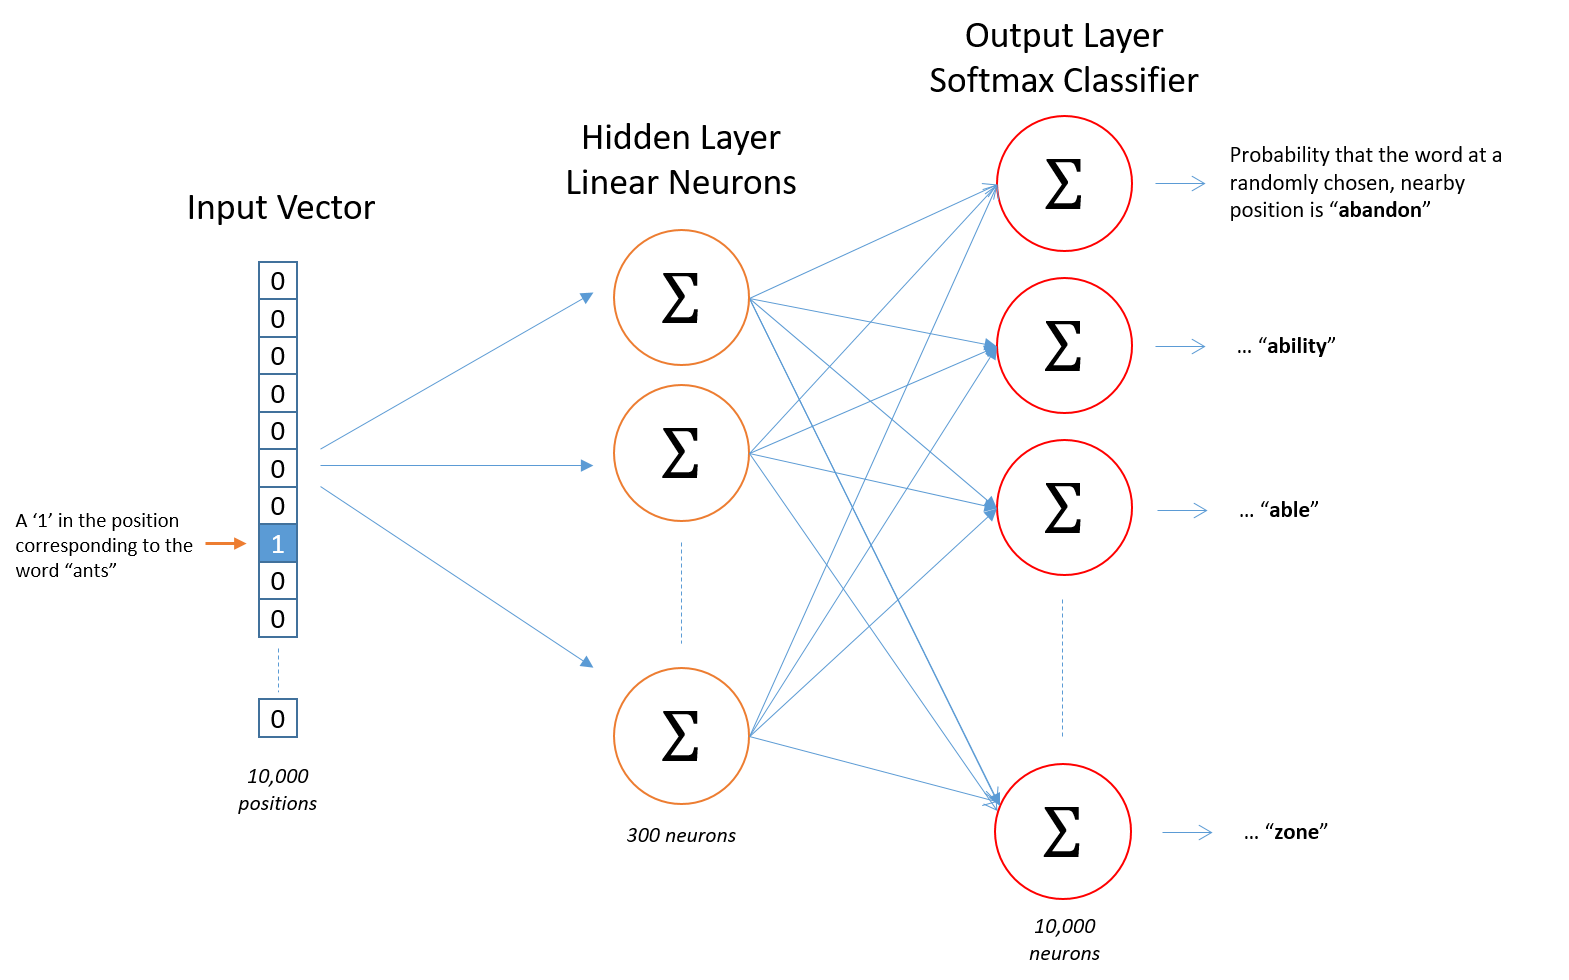

Citation: McCormick, C. (2016, April 19). Word2Vec Tutorial - The Skip-Gram Model. Retrieved from http://www.mccormickml.com.

In [103]:
# Use gensim's Word2Vec model; topic modeling
titles2vec = w2v.Word2Vec(
    sg=1, # skip-gram, as opposed to continuous BOW
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling)
# Each word/bigram is associated with a vector with 25 components

In [104]:
titles2vec.build_vocab(sentences_bigram) # initializing model on sentences_bigram corpus

In [105]:
len(titles2vec.wv.vocab) # length of vocab inversely related to min_count parameter

57284

In [106]:
titles2vec.train(sentences_bigram, total_examples=titles2vec.corpus_count, epochs=titles2vec.iter)

print(titles2vec.corpus_count) # corpus_count is number of titles
# print(titles2vec.iter)

148090


In [107]:
# Save the model
titles2vec.save("titles2vec_25.w2v")

In [108]:
# Load the saved model
titles2vec = w2v.Word2Vec.load("titles2vec_25.w2v")

# Recommendation System

Already associated a vector (with 25 components) with each word/bigram in the corpus.  Now SUM these vectors to get vector associated with paper title.

In [109]:
import numpy as np

# stop_words = set(stopwords.words("english"))
stop_words = stopwords.words("english")

def title_to_vec(title, model=titles2vec, dim=25):
    result = np.zeros(dim)
    # result = [0] * dim
    
    clean_1 = unidecode.unidecode(title) # to remove diacritical marks
    clean_2 = re.sub("[^a-zA-Z0-9]", " ", clean_1)
    words = bigram[clean_2.split()]
    words = [w.lower() for w in words if w not in stop_words and len(w)>3]
    
    for word in words:
        if word in model.wv.vocab:
            w2v = model.wv[word]
            result += w2v
    
    return result # maybe remove .tolist()

In [110]:
links_df['title_vec'] = links_df['title'].apply(lambda x: title_to_vec(x, model = titles2vec, dim = 25))

In [48]:
links_df.head()

,title,link,tag,title_vec
0,"Higgs line bundles, Green-Lazarsfeld sets,and ...",http://arxiv.org/abs/math/9204225v1,"<a href=""http://arxiv.org/abs/math/9204225v1"" ...","[-0.0054198624566197395, -0.02404667716473341,..."
1,A theory of algebraic cocycles,http://arxiv.org/abs/math/9204230v1,"<a href=""http://arxiv.org/abs/math/9204230v1"" ...","[0.007565644395072013, -0.01825173944234848, 0..."
2,Zariski Geometries,http://arxiv.org/abs/math/9304212v1,"<a href=""http://arxiv.org/abs/math/9304212v1"" ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Configuration spaces and the space of rational...,http://arxiv.org/abs/math/9410219v1,"<a href=""http://arxiv.org/abs/math/9410219v1"" ...","[0.011189675773493946, -0.022371498867869377, ..."
4,Stable vector bundles on algebraic surfaces,http://arxiv.org/abs/math/9411233v1,"<a href=""http://arxiv.org/abs/math/9411233v1"" ...","[0.03801389038562775, 0.004067144400323741, 0...."


In [111]:
tag_vec_dict = {}

for tag, vec in zip(links_df['tag'],links_df['title_vec']):
    tag_vec_dict[tag] = vec

Any search entry is regarded as a title.  Then compare vectors using cosine similarity.

In [112]:
def cos_sim(v1, v2):
    """Returns a cosine similarity of two vectors"""
    norm1, norm2 = np.linalg.norm(v1), np.linalg.norm(v2)
    norm_product = norm1 * norm2
    norm_ratio = min(norm1, norm2) / max(norm1, norm2)
    if norm_product == 0:
        return 0
    else:
        return np.dot(v1, v2) * norm_ratio / norm_product

In [155]:
def get_most_similar_title(title, dataframe = links_df, model = titles2vec, dim = 25, k = 5):
    """Returns LINKS to the k most similar titles to title"""
    new_vec = title_to_vec(title, model, dim)
    sim_list = links_df['title_vec'].apply(lambda x: cos_sim(new_vec, x))
    sim_list_sorted = sim_list.sort_values(ascending = False)
    
#    return sim_list
    
    indices = list(sim_list_sorted.index)[:k]
    
    similar_titles = [links_df.loc[i, 'tag'] for i in indices]
    
#    print("Search: " + new_title)
#    print('Similar Articles:\n')
#    for i, title in enumerate(similar_titles):
#        print('('+str(i+1)+')  '+title+'\n')
    
    return similar_titles

In [156]:
get_most_similar_title('symmetric')

['<a href="http://arxiv.org/abs/1407.6648v3" target = "_blank">Symmetric ribbon disks</a>',
 '<a href="http://arxiv.org/abs/1206.5420v1" target = "_blank">Symmetric Graphicahedra</a>',
 '<a href="http://arxiv.org/abs/1109.4322v1" target = "_blank">Continuous bounded cocycles</a>',
 '<a href="http://arxiv.org/abs/math/0109051v2" target = "_blank">Unitary Tridiagonalisation in M(4, C)</a>',
 '<a href="http://arxiv.org/abs/1104.5168v3" target = "_blank">Neighborliness of the symmetric moment curve</a>']

In [113]:
pickle.dump(tag_vec_dict, open("tag_vec_dict", "wb"))

In [114]:
def get_most_similar_title_heap(title, dict=tag_vec_dict, model = titles2vec, dim = 25, k = 5):
    """Returns LINKS to the k most similar titles to title"""
    new_vec = title_to_vec(title, model, dim)
    
    from heapq import heappush, heappop
    res = []
    for key, val in tag_vec_dict.items():
        sim = cos_sim(new_vec, val)
        if not res or len(res) < k or res[0][0] < sim: # res[0][0] is lowest sim value in res heap
            heappush(res, (sim, key))
        if len(res) > k:
            heappop(res) # lowest sim is popped off the heap
    similar_titles = [key for sim, key in sorted(res, reverse=True)]

    return similar_titles

In [160]:
get_most_similar_title_heap('symmetric')

['<a href="http://arxiv.org/abs/1407.6648v3" target = "_blank">Symmetric ribbon disks</a>',
 '<a href="http://arxiv.org/abs/1206.5420v1" target = "_blank">Symmetric Graphicahedra</a>',
 '<a href="http://arxiv.org/abs/1109.4322v1" target = "_blank">Continuous bounded cocycles</a>',
 '<a href="http://arxiv.org/abs/math/0109051v2" target = "_blank">Unitary Tridiagonalisation in M(4, C)</a>',
 '<a href="http://arxiv.org/abs/1104.5168v3" target = "_blank">Neighborliness of the symmetric moment curve</a>']

# Data Visualization

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [118]:
# Create a TSNE instance
tsne = TSNE(n_components = 2, learning_rate = 200) # 200 is the default learning rate; may play around with this*
# flatten to two dimensions for plotting purposes

In [66]:
for word in titles2vec.wv.vocab:
    print(titles2vec.wv.vocab[word].index, word, titles2vec.wv.vocab[word].count) # index is based on frequency!

0 bundles 3
3 maps 2
4 kahler_manifolds 2
5 theory 2
1 algebraic 3
6 configuration_spaces 2
7 rational_curves 2
8 toric 2
9 stable 2
10 vector_bundles 2
2 cohomology 3
11 combinatorial 2
12 homotopy_groups 2
13 homology 2
14 topological 2
15 symmetric 2
16 spectra 2


In [119]:
all_word_vectors_matrix = titles2vec.wv.syn0 # access output en masse as a 2d numpy array

# Train t-SNE
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [120]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[titles2vec.wv.vocab[word].index])
            for word in titles2vec.wv.vocab
        ]
    ],
    columns = ["word", "x", "y"]
)

print(points.head())
print(points.tail())

               word          x          y
0             higgs  29.824839  -4.417623
1      line_bundles -38.125957   1.045884
2  green_lazarsfeld  18.335035  17.591965
3              sets -38.180222   6.830677
4              maps -39.059772   7.481574
                           word          x          y
57279   polchinski_grothendieck  27.428474  13.409739
57280     hyperbolic_sutherland  11.415271  27.238989
57281  symplectic_microgeometry  16.104019 -41.275692
57282    azumaya_noncommutative   3.474745  28.529062
57283          schneider_diejen   3.387391  32.659004


In [121]:
# Save t-SNE coordinates
points.to_csv('w2v_points.csv',index=False)

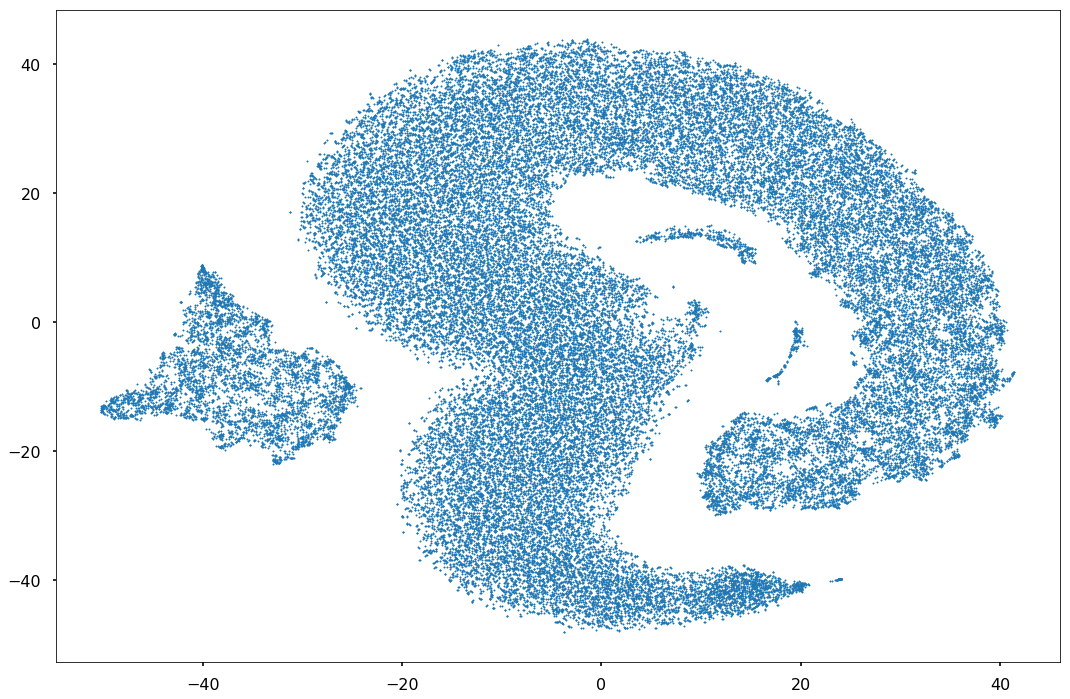

In [123]:
sns.set_context("poster")

plt.figure(figsize=(18, 12))

plt.scatter(points['x'], points['y'], s = 2)
plt.show()

In [125]:
# annotate words in our t-SNE point-cloud

plt.figure(figsize=(20, 12))

for x, y, word in zip(points['x'], points['y'], points['word']):
    plt.annotate(word, (x, y), fontsize=2)

plt.scatter(points['x'], points['y'], s = 2)
plt.show()

In [132]:
# Plot zoomed regions
def plot_region(x_bounds, y_bounds):
    s = points[ (points['x'] >= x_bounds[0]) & (points['x'] <= x_bounds[1])] 
    s = s[(s['y'] >= y_bounds[0]) & (s['y'] <= y_bounds[1])]
    plt.figure(figsize=(10, 8))
    plt.scatter(s['x'],s['y'],s=33)
#    for i, point in s.iterrows():
#        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=10)
    for x, y, word in zip(s['x'], s['y'], s['word']):
        plt.annotate(word, (x, y), fontsize=10)
    plt.show()

# 's' is a "restricted" dataframe, restricted in both x- and y-directions

In [133]:
# Given a query word, plot nearby words
def plot_nearby(word,side_len=4):
    if side_len <= 0:
        print('---------------------side_len must be greater than zero!---------------------')
    elif word not in titles2vec.wv.vocab:
        print('---------------------Cannot find %s in the vocabulary---------------------' % word)
    else:
        coordinates = points[points['word']==word].reset_index() # reset index to 0, only one row
        x, y = coordinates.loc[0,'x'], coordinates.loc[0,'y']
        x1, x2, y1, y2 = x-side_len/2, x+side_len/2, y-side_len/2, y+side_len/2
        plot_region(x_bounds=(x1,x2), y_bounds=(y1,y2))

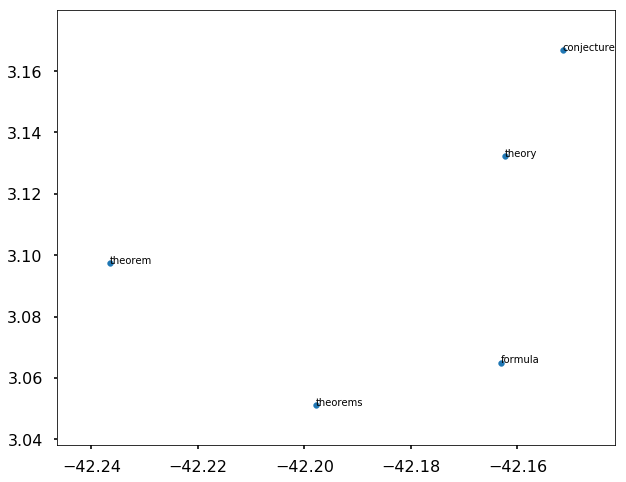

In [140]:
plot_nearby('theory',0.3)

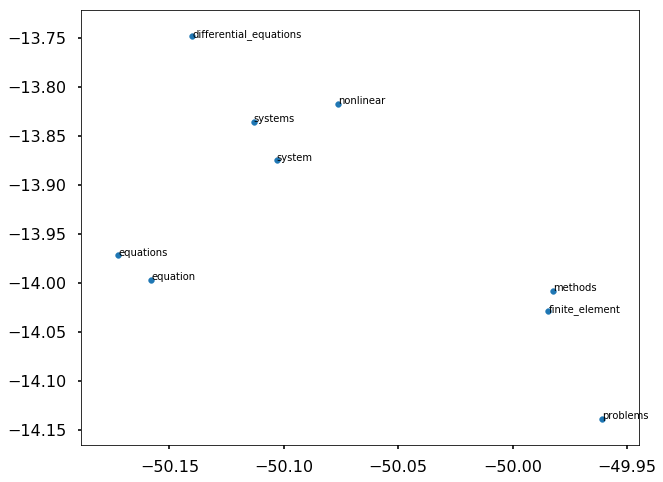

In [154]:
plot_nearby('equation',0.5)

Future directions:
- Implement alternative vectorization models, such as GloVe (Global Vectors for Word Representation)
- Allow user to search within mathematical categories
- Display authors, in addition to similar titles
- Allow user to filter results by date
- Make application more efficient/scalable

$\pm$Epsilon is at:  https://rohan-epsilon.herokuapp.com